# Instagram Reach Analysis using Machine Learning Technique

1) Data Pre-Processing : 
   * Add Dataset 
   * check null value and remove all null value. 

2) Analysis : 
   * Find Out the figure density graph. 
   * Show total Feature impact of these dataset as Bar or pie diagram. 
   * Analysis context Caption & Hashtag.
   * Scatter Fig between Impression and Like, 
   * Scatter Fig between Impression and comment, 
   * Scatter Fig between Impression and share, 
   * Scatter Fig between Impression and saves, 
   * Find out the correlation data (Impressions, Likes,From Hashtags, Follows, Profile Visits, Saves, From Home, From Explore, 
     Shares, From Other, Comments). 
   * Analyzing Conversion Rate 

3) Model Selection And prediction

### Data Pre-Processing

In [1]:
import pandas as pd

data = pd.read_csv("E:\ML_Projects\Instra_Reach_Analysic\Dataset\Instagram_data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
# find the null feature, 
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Here have no null data found into feature, If we found any null value we need data drop using data.dropna() method.

### Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_20612\2045195232.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




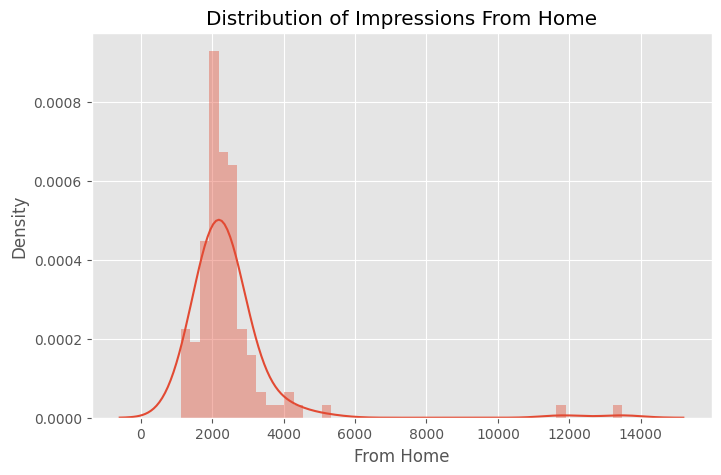

C:\Users\DELL\AppData\Local\Temp\ipykernel_20612\2045195232.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




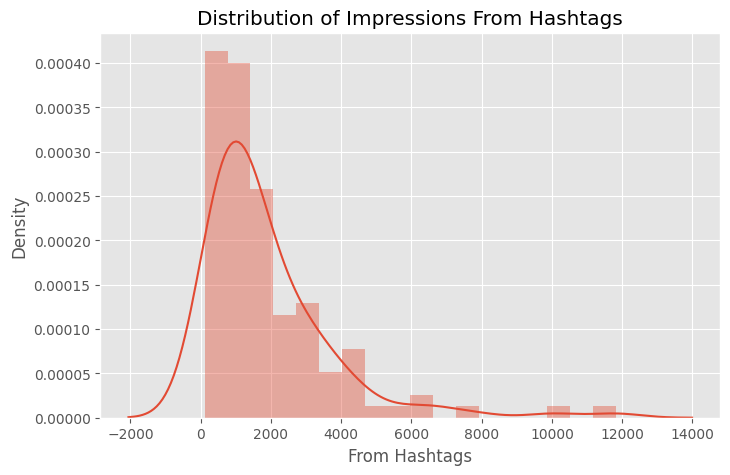

C:\Users\DELL\AppData\Local\Temp\ipykernel_20612\2045195232.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




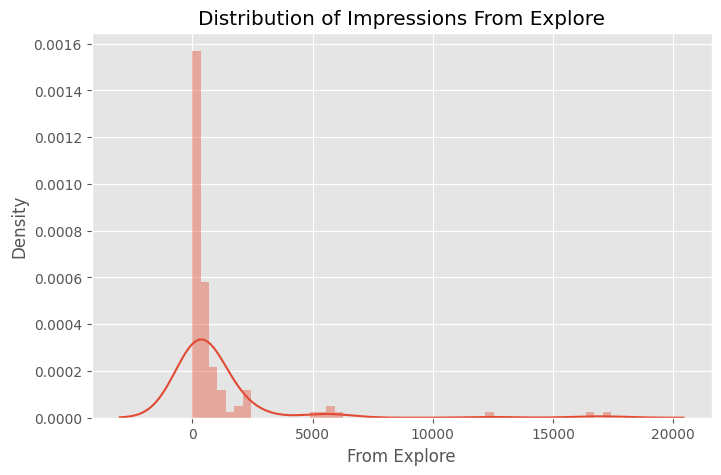

C:\Users\DELL\AppData\Local\Temp\ipykernel_20612\2045195232.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




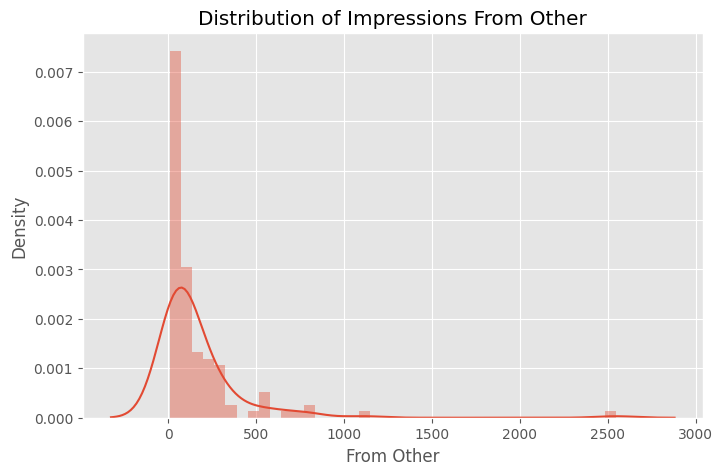

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


features = ['From Home', 'From Hashtags', 'From Explore', 'From Other']

for n in range(0,len(features)):
    plt.figure(figsize=(8,5))
    plt.title(f"Distribution of Impressions {features[n]}")
    sns.distplot(data[features[n]])
    plt.show()



show a pie of most reach place of Instrgrame (From Home', 'From Hashtags', 'From Explore', 'From Other')

In [48]:
import plotly.graph_objects as go


Home = data['From Home'].sum()
Hashtags = data['From Hashtags'].sum()
Explore = data['From Explore'].sum()
Other = data['From Other'].sum()

ReactionFeature = [Home, Hashtags, Explore, Other]
ReactionLabels = ["From Home", "From Hashtags", "From Explore", "From Other"]

fig = go.Figure(data=[go.Pie(labels=ReactionLabels, values=ReactionFeature, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()


show a pie of most reaction type (like, comment, share, saves)

In [49]:
import plotly.graph_objects as go


like = data['Likes'].sum()
comment = data['Comments'].sum()
share = data['Shares'].sum()
saves = data['Saves'].sum()


labels = ['Likes', 'Comments', 'Shares', 'Saves']
values = [like,comment,share, saves]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [22]:
from collections import Counter
import plotly.express as px
import pandas as pd

feature2Name = ["Caption", "Hashtags"]

for n in range(0,len(feature2Name)):
    words = " ".join(data[feature2Name[n]]).split()
    word_freq = Counter(words)
    df_word_freq = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
    fig = px.bar(df_word_freq.nlargest(10, 'frequency'), x='word', y='frequency',
             title="Top 10 Most Frequent Words in Captions")
    fig.show()

In [21]:
import plotly.express as px

impressionsName = ["Shares","Likes", "Comments", "Follows","Saves"]

for n in range(0,len(impressionsName)):
    impressionFigure = px.scatter(data_frame=data, 
                                  x="Impressions", 
                                  y=impressionsName[n], 
                                  trendline="ols", 
                                  color=impressionsName[n],
                                  title= f"Relationship between Impression Vs {impressionsName[n]}")
    impressionFigure.show()


Finding the conversion Rate for understanding the how reach the post of followers

In [31]:

conversion_rate = (data['Follows'].sum() / data['Profile Visits'].sum()) * 100
print(f"Conversion Rate : {conversion_rate}")

Conversion Rate : 41.00265604249668


In [34]:
import plotly.express as px

figureConversionRate = px.bar(data_frame=data, x="Profile Visits", y="Follows",color="Follows")
figureConversionRate.show()

### Instagram Reach Prediction Model

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Assuming 'data' is a DataFrame that you have already defined
x = np.array(data[['Likes','Shares','Comments','Saves','Profile Visits', 'Follows']])
y = np.array(data['Impressions'])

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Selection
model = XGBRegressor()
model.fit(x_train, y_train)

# Evaluate the model
score = model.score(x_test, y_test)
print(f"Model R^2 Score: {score}")

# Predict the reach of an Instagram post by giving inputs to the model
predictionFeature = []
reactionFeatureName = ['Likes', 'Shares', 'Comments', 'Saves', 'Profile Visits', 'Follows']

for n in range(len(reactionFeatureName)):
    question = int(input(f"Enter Total Number of {reactionFeatureName[n]}: "))
    predictionFeature.append(question)

# Convert the input list to a numpy array and reshape it to match the model's input requirements
predictionFeature = np.array(predictionFeature).reshape(1, -1)

# Make the prediction
predicted_reach = model.predict(predictionFeature)
print(f"Predicted Impressions: {predicted_reach[0]}")


Model R^2 Score: 0.9721905064942188
Predicted Impressions: 10312.791015625
